In [1]:
from sympy import init_printing, symbols, diff, simplify, integrate, lambdify, Rational, solveset, Eq, \
    cancel, Rational, factor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
init_printing()

In [2]:
x,y, m,t, H, Ha, H0, H1, g, T, k, I, Ta, l, a = symbols("x y m t H H_alpha H_0 H_1 g T k I T_alpha l a")

Let's now look at the natural tragjectory of an object thrown in to the air.

This can also be written as $ x = H_0 - \frac{4 H_0 t^2}{T^2} $

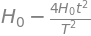

In [3]:
xx = H0 - 4 * H0 * t**2/T**2; xx

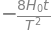

In [4]:
vv = diff(xx, t); vv

$V_0$ (initial velocity) can be calculated by substituting -T/2 into the above

In [5]:
vv.subs(t, -T/2)

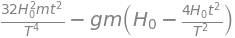

In [6]:
ll = m*vv**2/2 - m*g*xx; ll

In [7]:
ii = integrate(ll, (t, -T/2, T/2)); ii

In [8]:
simplify(ii)

In [9]:
display(Eq(I,simplify(ii)))

In [10]:
solveset(diff(ii, H0), H0)

Took me a bit to figure this out but $ \frac{T^2}{g} $ represents the value
of H0 if we equated the kinetic energy as a function of H0 with the 
potential energy for H0 and solved for H0.  This is legitimate if we start with
maximum kinetic energy and zero kinetic energy at the start and then at some point on
the trajectory this is reversed.

We are using a very crude graph with 3 points to see what happens when we apply the principle of least action.
Specifically $ \mathcal{L} = \frac{1}{2}m v^2 - m g h $.  Because I am modelling with straight line segments I use $ \mathcal{L} =  \frac{1}{2}m v^2 - m g v t $.

In [11]:
# First of all ascertain a piecewise function for x as a function of t
# H0 is our highest point reached and T is the time taken for a particle for the entire trajectory, 
# leaving and returning
x1 = (t+T/2)*H0/(T/2); x2 = H0 - (t)*H0/(T/2)
x = (x1,x2)
x

In [12]:
# Now derive piecewise velocity function
v = [diff(z,t) for z in x]
v

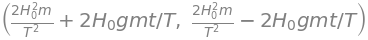

In [13]:
# compute the piecewise Lagrangian
L1 = m*v[0]**2/2 + m*g*v[0]*t ; L2 = m*v[1]**2/2 + m*g*v[1]*t 
L1, L2

In [14]:
# Integrate the Lagrangian over the piecewise interval w.r.t time (t)
I1 = integrate(L1, (t, 0, T/2))
I2 = integrate(L2, (t, T/2, T))
II = simplify(I1+I2);
II

In [15]:
cancel(diff(II, H0))

In [16]:
# Now we want to find a stationary point w.r.t H0 (our highest point) and then solve for H0
H0res =solveset(diff(II, H0), H0)
H0res

In [17]:
II.subs(H0, H0res.args[0])

We are not going to plot the trajectory in matplotlib so we can see the basic shape of the trajectory

In [18]:
f1 = lambdify(t, x1.subs([(H0,1), (T,1)]), "numpy" )
f2 = lambdify(t, x2.subs([(H0,1), (T,1)]), "numpy" )
def f(t):
    if t <= .5:
        return f1(t)
    else:
        return f2(t)
vf = np.vectorize(f)

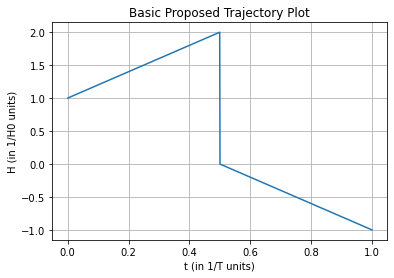

In [19]:
fig, ax = plt.subplots()

xx = np.linspace(0, 1, 1000)

ax.plot(xx, vf(xx))
ax.set_title("Basic Proposed Trajectory Plot")
ax.set_xlabel("t (in 1/T units)")
ax.set_ylabel("H (in 1/H0 units)")
ax.grid()

Now lets split the trajectory up into four line segments and we will call the height of the trajectory midway 
between half time and the start as H1.  (It's basically quarter time or T/4).  Again we break it up into a piecewise function.

In [20]:
# position as a function of time as a piecewise function
x1 = t*H1/(T/4); x2 = H1 + (t - T/4)*(H0-H1)/(T/4)
x3 = H0 - (t-T/2)*(H0-H1)/(T/4)
x4 = H1 - (t - 3*T/4)*H1/(T/4)
x = (x1,x2,x3, x4)

x

Now we show what such a curve might look like by arbitrarily assigning values to H0 and H1

In [21]:
ffs = []
for xx in x:
    fi = lambdify(t, xx.subs([(H0,1), (H1, .8), (T,1)]), "numpy" )
    ffs.append(fi)

def f(t):
    if t <= .25:
        return ffs[0](t)
    elif .25 < t <= .5:
        return ffs[1](t)
    elif .5 < t <= .75:
        return ffs[2](t)
    else:
        return ffs[3](t)
vf = np.vectorize(f)

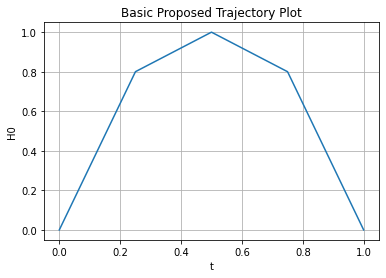

In [22]:
fig, ax = plt.subplots()

xx = np.linspace(0, 1, 1000)

ax.plot(xx, vf(xx))
ax.set_title("Basic Proposed Trajectory Plot")
ax.set_xlabel("t")
ax.set_ylabel("H0")
ax.grid()

In [23]:
# Compute velocities of our new piecewise function
v = [diff(z,t) for z in x]
v

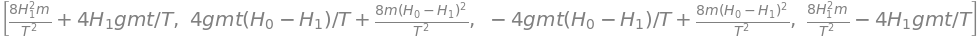

In [24]:
# Compute the Lagrangians of our new piecewise function
LL = []
for i,xx in enumerate(x):
    ll = m*v[i]**2/2 + m*g*v[i]*t
    LL.append(ll)
LL

In [25]:
IIS = []
for i, xx in enumerate(x):
    II = integrate(LL[i], (t, i*T/4, (i+1)*T/4))
    IIS.append(II)
action = simplify(sum(IIS))
action

Now we substitute H1 for a scale multiple K of H0 and try to figure out K

In [26]:
aa = action.subs(H1, k*H0)
aa

In [27]:
# Now try to find out where the action is stationary while we vary K
diff(aa,k)

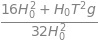

In [28]:
# solve for k at the stationary point
k_expr = solveset(diff(aa, k),k).args[0]; k_expr

In [29]:
# subsitute k back into our original expression for action
action = simplify(aa.subs(k, k_expr)); action

In [30]:
diff(action, H0)

In [31]:
solveset(diff(action,H0), H0)

Now we get the same expression for H0 as before so now lets use this to calculate H1.  Remember we have an expression for k above

In [32]:
k_expr.subs(H0, H0res.args[0])


Hence we have found that H1 is 3/4 of H0.  This makes sense for an upside down parabola which reaches a height of 1 unit in the middle.  Therefore 1/4 of the way along it should reach a height of 3/4.  I am wondering if we can work out points on the true trajectory for all applications of the Lagrangian this way or just the one we used in this special case.

In [33]:
tintervals = [0, Ta, T/2, T-Ta, T]; tintervals

In [34]:
yexprs = [0, Ha, H, Ha, 0]; yexprs

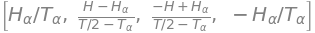

In [35]:
vs = []
for ii in range(len(tintervals)-1):
    vs.append ((yexprs[ii+1] - yexprs[ii])/(tintervals[ii+1] - tintervals[ii]))
vs

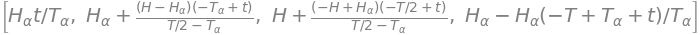

In [36]:
xs = []
for ii in range(len(tintervals)-1):
    xs.append (yexprs[ii] + vs[ii]*(t-tintervals[ii]))
xs

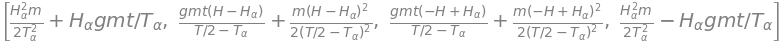

In [37]:
# Compute the Lagrangians of our new piecewise function
LL = []
for i in range(0, len(v)):
    ll = m*vs[i]**2/2 + m*g*vs[i]*t
    LL.append(ll)
    #display(ll)
LL

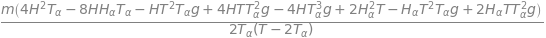

In [53]:
# Compute the integral of the Lagrangian
II = []
for i in range(0, len(v)):
    iii = integrate(LL[i], (t, tintervals[i], tintervals[i+1]))
    II.append(iii)
    #display(iii)
res = simplify(sum(II))
res

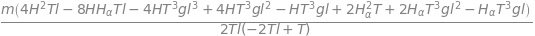

In [54]:
res1aaa = res.subs(Ta, l*T); res1aaa

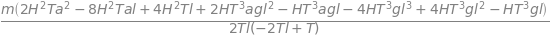

In [59]:
res1aa = res1aaa.subs(Ha, a*H); res1aa

In [60]:
res1a = cancel(diff(res1aa, H)).args[1]; factor(res1a)

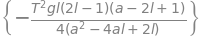

In [61]:
res1 = solveset(res1a, H)
res1

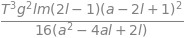

In [42]:
res2a = simplify(res1aa.subs(H, res1.args[0])); factor(res2a)

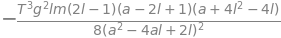

In [51]:
res3a = factor(cancel(diff(res2a, a))); res3a


In [52]:
res4 = solveset(res3a, a); res4.args[0]


In [64]:
simplify(res1.subs(a, res4.args[0].args[1]))